In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [55]:
img = cv2.imread("desk2.jpg")
scale_percent = 40       # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
resized.shape

(432, 576, 3)

In [80]:
imgA = cv2.imread("desk2.jpg")
imgB = cv2.imread("desk1.jpg")

In [81]:
# resize
scale_percent = 40       # percent of original size
width = int(imgA.shape[1] * scale_percent / 100)
height = int(imgA.shape[0] * scale_percent / 100)
dim = (width, height)

imgA = cv2.resize(imgA, dim, interpolation = cv2.INTER_AREA)
imgB = cv2.resize(imgB, dim, interpolation = cv2.INTER_AREA)

In [82]:
# 转换成灰色
grayA = cv2.cvtColor(imgA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY) 

In [83]:
height, width = grayA.shape
print(height, width)

432 576


In [112]:
result_window = np.zeros((height, width), dtype=imgA.dtype)
for start_y in range(0, height-100, 10):
    for start_x in range(0, width-100, 10):
        window = grayA[start_y:start_y+100, start_x:start_x+100]
        match = cv2.matchTemplate(grayB, window, cv2.TM_CCOEFF_NORMED)
        _, _, _, max_loc = cv2.minMaxLoc(match)
        matched_window = grayB[max_loc[1]:max_loc[1]+100, max_loc[0]:max_loc[0]+100]
        result = cv2.absdiff(window, matched_window)
        result_window[start_y:start_y+100, start_x:start_x+100] = result

In [113]:
_, result_window_bin = cv2.threshold(result_window, 150, 405, cv2.THRESH_BINARY)

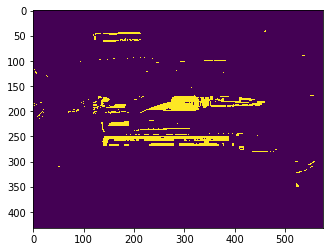

In [114]:
plt.imshow(result_window_bin)

In [115]:
contours, _ = cv2.findContours(result_window_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [116]:
imgC = imgA.copy()
for contour in contours:
    min = np.nanmin(contour, 0)
    max = np.nanmax(contour, 0)
    loc1 = (min[0][0], min[0][1])
    loc2 = (max[0][0], max[0][1])
    cv2.rectangle(imgC, loc1, loc2, 255, 2)

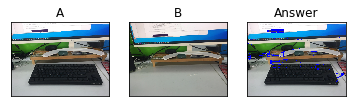

In [117]:
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(imgA, cv2.COLOR_BGR2RGB)), plt.title('A'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(imgB, cv2.COLOR_BGR2RGB)), plt.title('B'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(imgC, cv2.COLOR_BGR2RGB)), plt.title('Answer'), plt.xticks([]), plt.yticks([])
plt.show()

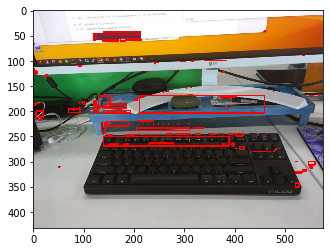

In [118]:
plt.imshow(imgC)

In [119]:
cv2.imwrite('resoult.jpg',imgC)

True